In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp
import time

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


Text(0, 0.5, 'Y')

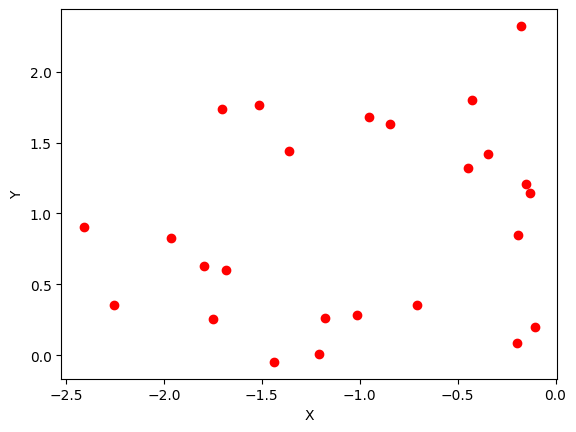

In [2]:
x = np.load("circle_data_1.npy") # \in \mathcal{R}^{2}
plt.figure(1)
plt.scatter(x[0], x[1], color = 'red', marker = 'o')
plt.xlabel("X")
plt.ylabel("Y")

In [3]:
T = x.size // 2
print("C_1 size: ", x.size)

C_1 size:  50


In [4]:
A = np.array([[1, -2*x[0,0], -2*x[1,0]]])
for k in range(1,T):
    A = np.concatenate((A, [ [1, -2*x[0,k], -2*x[1,k]] ]), axis=0)

b = np.array( [[ -np.inner(x[:,0], x[:,0]) ]] )
for k in range(1,T):
    b = np.concatenate((b, [[-np.inner(x[:,k], x[:,k]) ]]), axis=0)

In [5]:
y_c = cp.Variable((3,1))

J_inside = A@y_c - b

J = cp.sum_squares(J_inside)

constraints = []

objective = cp.Minimize(J)
prob = cp.Problem(objective, constraints)
result = prob.solve()

In [6]:
c1 = y_c.value.T

c = c1[0][1:3]
R = np.sqrt(np.inner(c,c) - y_c[0].value)

print("Status: ", prob.status, "Optimal: ", prob.value, "y_c: ", y_c.value, "R: ", R)


Status:  optimal Optimal:  6.978047652990909 y_c:  [[ 1.15943005]
 [-1.06211003]
 [ 0.99475605]] R:  [0.97887041]


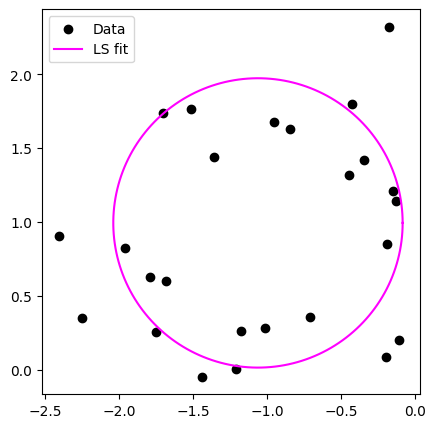

In [7]:
# Plot result
theta = np.linspace(0, 2*np.pi, 200)
circle_x = c[0] + R * np.cos(theta)
circle_y = c[1] + R * np.sin(theta)

plt.figure(figsize=(5,5))
plt.scatter(x[0], x[1], color='black', label='Data')
plt.plot(circle_x, circle_y, color='magenta', label='LS fit')
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

Tested this formulation with the circle_data_1.npy and this result is identical to that mentioned in the tasksheet

In [8]:
x = np.load('circle_data_2.npy')

T = x.shape[1]

print("X size: ", x.size)

X size:  50


In [9]:
A = np.array([[1, -2*x[0,0], -2*x[1,0]]])
for k in range(1,T):
    A = np.concatenate((A, [ [1, -2*x[0,k], -2*x[1,k]] ]), axis=0)

b = np.array( [[ -np.inner(x[:,0], x[:,0]) ]] )
for k in range(1,T):
    b = np.concatenate((b, [[-np.inner(x[:,k], x[:,k]) ]]), axis=0)

In [10]:
prob = np.linalg.lstsq(A, b, rcond=None)
c1 = prob[0].flatten()
c = c1[1:3]
y = c1[0]

R = np.sqrt(np.inner(c, c) - y)

print("y:", y)
print("Center:", c)
print("Radius:", R)

y: 2.1114109256715654
Center: [-0.44638224  1.50461084]
Radius: 0.5930429544769906


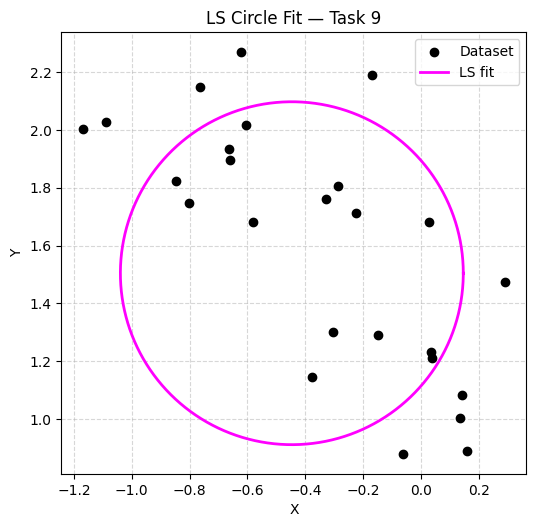

In [11]:
theta = np.linspace(0, 2*np.pi, 500)
circle_x = c[0] + R * np.cos(theta)
circle_y = c[1] + R * np.sin(theta)

plt.figure(figsize=(6,6))
plt.scatter(x[0,:], x[1,:], color='black', label='Dataset', zorder=3)
plt.plot(circle_x, circle_y, color='magenta', label='LS fit', linewidth=2)
plt.gca().set_aspect('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('LS Circle Fit — Task 9')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()